In [1]:
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np
import os
import pandas as pd
import scipy.fft
import csv


In [2]:
# Load data
a_meas = [] 
a_sim = []
a_sim_minus_meas = []
path = 'data.csv'
with open(path, 'r') as f:
    reader = csv.reader(f, delimiter=';')
    headers = next(reader)
    for row in reader:
        a_meas.append(float(row[0]))
        a_sim.append(float(row[1]))
        a_sim_minus_meas.append(float(row[0])-float(row[1]))

In [29]:
sample_rate = 500
dt = 1/sample_rate
time_array = np.arange(0, len(a_meas)/sample_rate,dt)
print(time_array[0])
print(time_array[-1])

0.0
625.394


" plt.subplot(2, 1, 2)\nplt.plot(t_array, F_in_array, 'r', label='F_in')\nplt.legend()\nplt.grid()\nplt.ylim(0, 2)\nplt.xlabel('t [s]')\nplt.ylabel('[m3/s]') "

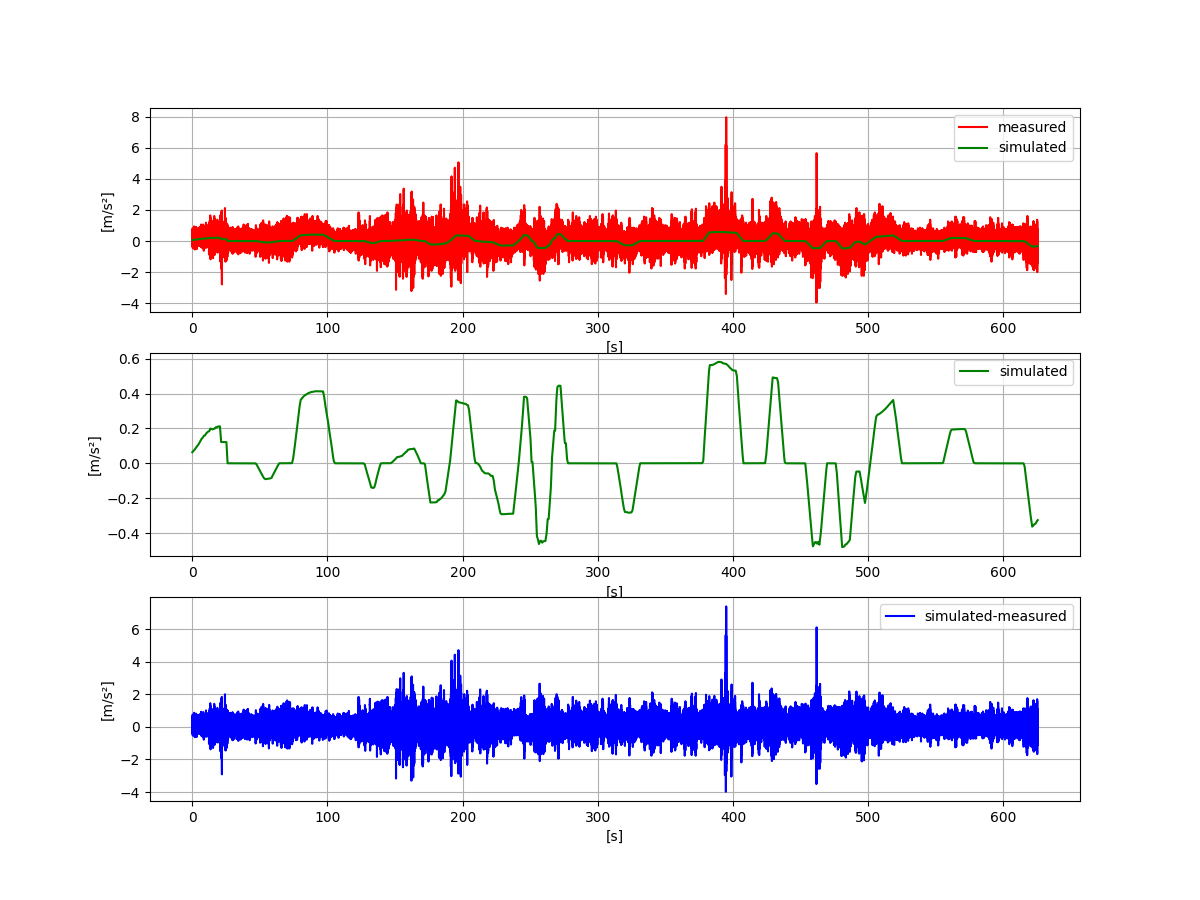

In [37]:
plt.close('all')
plt.figure(1, figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(time_array, a_meas, 'r', label='measured')
plt.plot(time_array, a_sim, 'g', label='simulated')
plt.legend()
plt.grid()
plt.xlabel('[s]')
plt.ylabel('[m/s²]')

plt.subplot(3, 1, 2)
plt.plot(time_array, a_sim, 'g', label='simulated')
plt.legend()
plt.grid()
plt.xlabel('[s]')
plt.ylabel('[m/s²]')

plt.subplot(3, 1, 3)
plt.plot(time_array, a_sim_minus_meas, 'b', label='simulated-measured')
plt.legend()
plt.grid()
plt.xlabel('[s]')
plt.ylabel('[m/s²]')

""" 
When we look at the first plot where the simulated data is drawn on top of the measured, 
we can see that the simulated data paints a good picture of the trend or moving average data from the measured.
This means that the simulation probably paints the correct picture when the train tracks are in optimal conditions.
When subtracting the measured data from the simulated, we should end up with mostly random noise if the simulation is correct.
Since the result of the substraction is not random noise, but still contians some residuals, it is possible these residuals are indicators of non-optimal track conditions.
"""

[0.00000000e+00 1.59898688e-03 3.19797376e-03 ... 4.99995203e+02
 4.99996802e+02 4.99998401e+02]


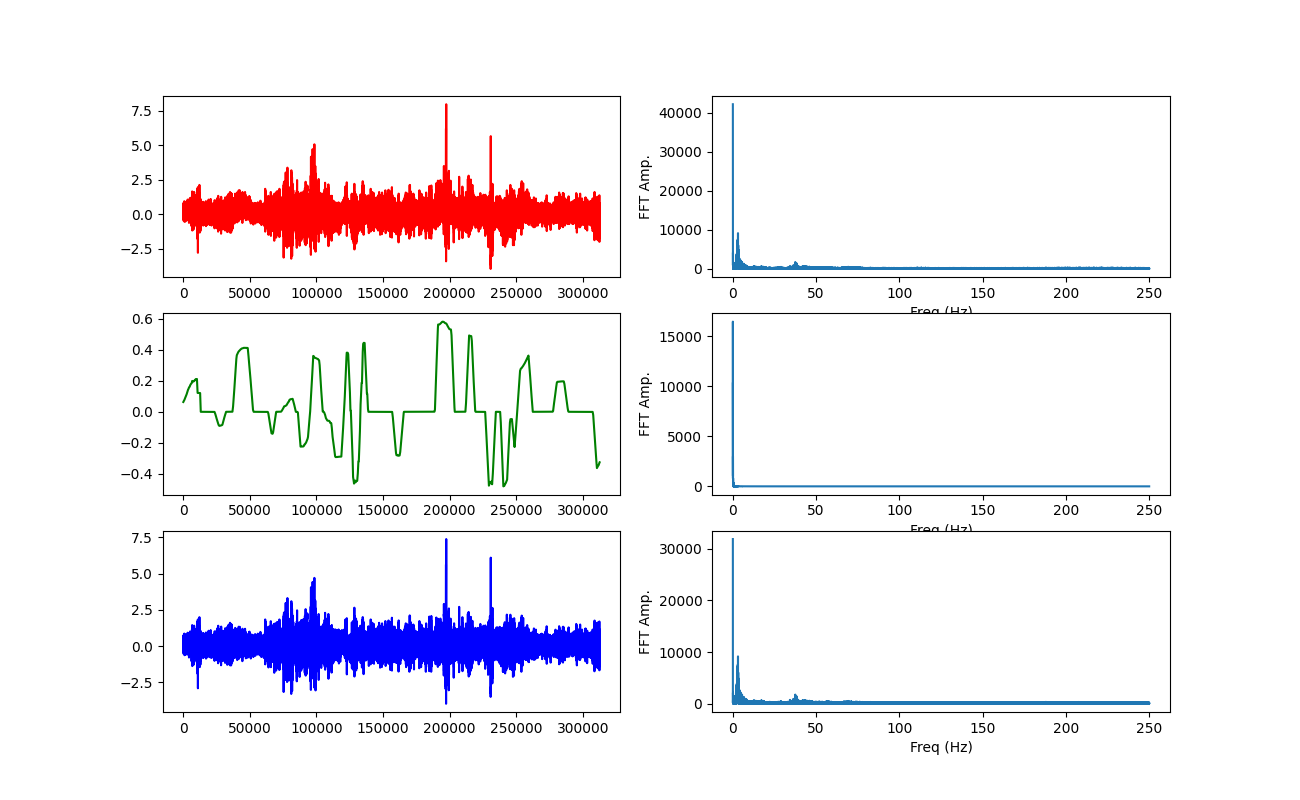

In [38]:
fourier_transform_meas = np.fft.fft(a_meas)
fourier_transform_sim = np.fft.fft(a_sim)
fourier_transform_sim_minus_meas = np.fft.fft(a_sim_minus_meas)
transform_length = np.arange(len(fourier_transform_meas)) #Counting array [0,1,2,...,312 697]
sampling_period = len(fourier_transform_meas)/(sample_rate)
fourier_frequency = transform_length/sampling_period
print(fourier_frequency)

plt.close('all')
plt.figure(figsize=(13, 8))

# measured
plt.subplot(3, 2, 1)
plt.plot(a_meas, 'r')

plt.subplot(3, 2, 2)
plt.plot(fourier_frequency[:len(fourier_transform_meas)//2+1],
         np.abs(fourier_transform_meas[:len(fourier_transform_meas)//2+1]))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amp.')

# simulated
plt.subplot(3, 2, 3)
plt.plot(a_sim, 'g')

plt.subplot(3, 2, 4)
plt.plot(fourier_frequency[:len(fourier_transform_sim)//2+1],
         np.abs(fourier_transform_sim[:len(fourier_transform_sim)//2+1]))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amp.')

#difference
plt.subplot(3,2,5)
plt.plot(a_sim_minus_meas, 'b')

plt.subplot(3,2,6)
plt.plot(fourier_frequency[:len(fourier_transform_sim_minus_meas)//2+1], np.abs(fourier_transform_sim_minus_meas[:len(fourier_transform_sim_minus_meas)//2+1]))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amp.')
plt.show()


C:\Users\larsr\AppData\Local\Temp\ipykernel_28916\2713962180.py:1: RuntimeWarning: divide by zero encountered in true_divide
  frequency_to_hours = 1/fourier_frequency/(60)


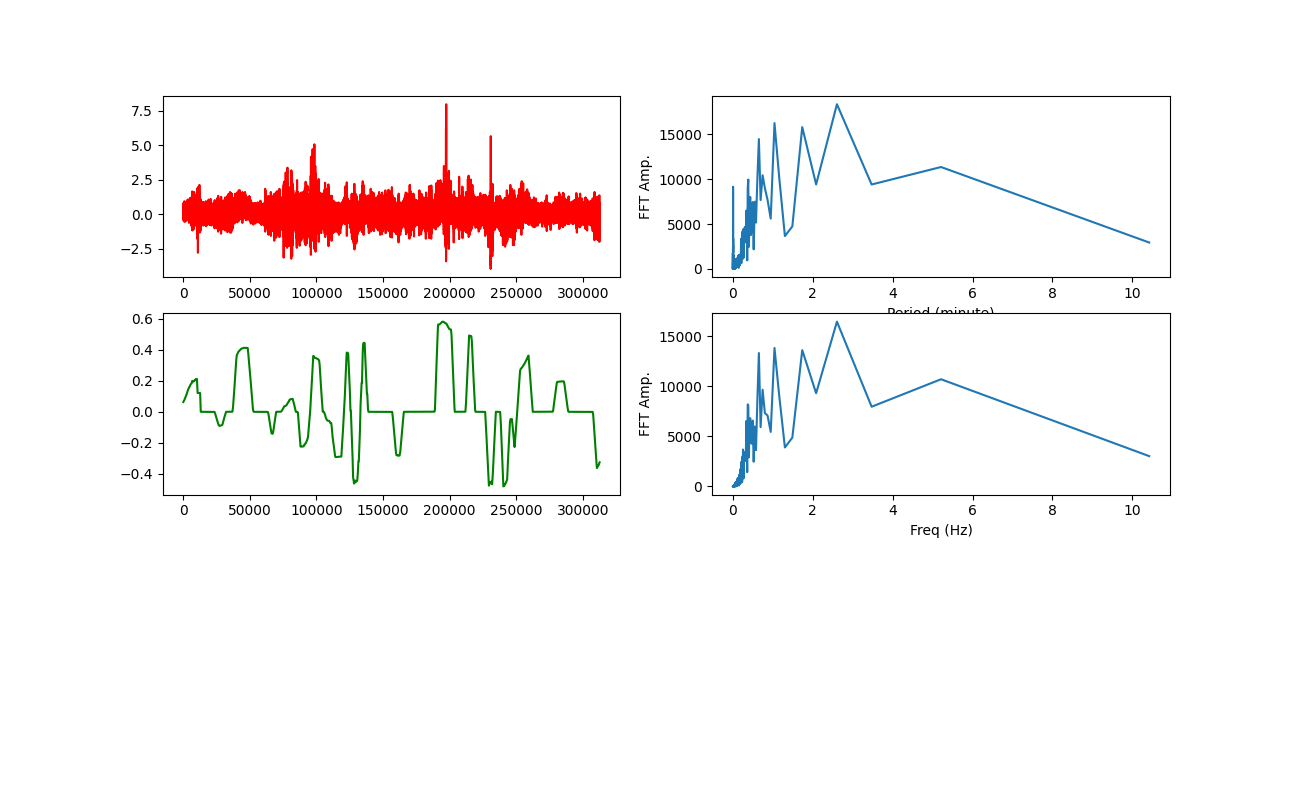

In [39]:
# measured
plt.subplot(3, 2, 1)
plt.plot(a_meas, 'r')

plt.subplot(3, 2, 2)
plt.plot(fourier_frequency[:len(fourier_transform_meas)//2+1],
         np.abs(fourier_transform_meas[:len(fourier_transform_meas)//2+1]))
plt.xlabel('Period (minute)')
plt.ylabel('FFT Amp.')

#Leakage effect?
# simulated
plt.subplot(3, 2, 3)
plt.plot(a_sim, 'g')

plt.subplot(3, 2, 4)
plt.plot(fourier_frequency[:len(fourier_transform_sim)//2+1],
         np.abs(fourier_transform_sim[:len(fourier_transform_sim)//2+1]))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amp.')
plt.show()

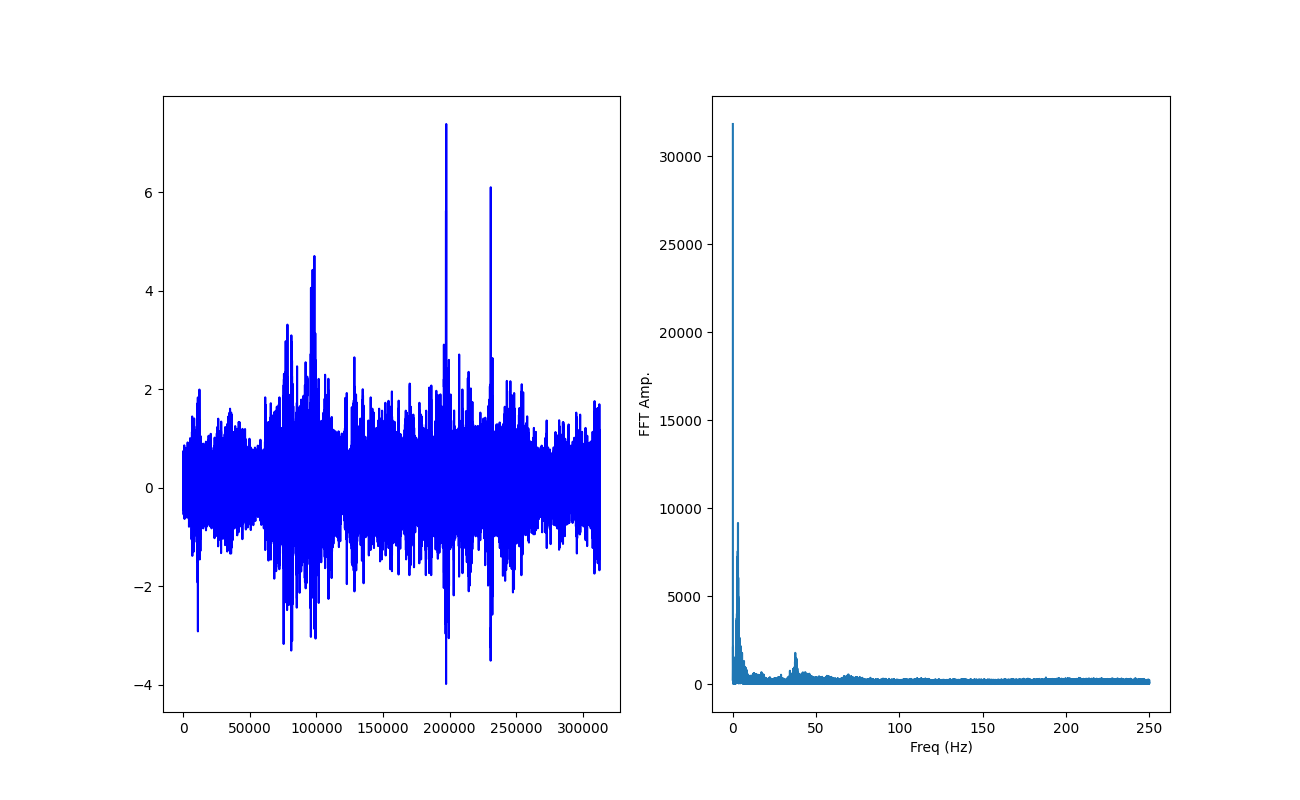

' \ncomparing modeled and simulated data by subtraction, and using FFT on the difference, we would expect to \nsee a flat frequency spectrum, i.e., where the energy and therefore information content is \nevenly distributed across the frequencies.  '

In [31]:
plt.figure(figsize = (13, 8))
#difference
plt.subplot(3,2,1)
plt.plot(a_sim_minus_meas, 'b')

plt.subplot(3,2,2)
plt.plot(fourier_frequency[:len(fourier_transform_sim_minus_meas)//2+1], np.abs(fourier_transform_sim_minus_meas[:len(fourier_transform_sim_minus_meas)//2+1]))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amp.')
plt.show()

""" 
comparing modeled and simulated data by subtraction, and using FFT on the difference, we would expect to 
see a flat frequency spectrum, i.e., where the energy and therefore information content is 
evenly distributed across the frequencies.  """